In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

# conda install tweepy
# conda install textblob
# conda install wordcloud

In [3]:
# Twitter API
twitterApiKey = "i5X2YEiQqenRtgVFvi0dFrEH5"
# HLYgAClV7KDuGeeA7fBoHsRkw
twitterApiSecret = "MWb99ie3FPhjJklsfZ1eBrpedQoOn3KzleNhpvUwaeLEa3RaF1"
# xheT2X7PgjZ8eODVw6bJBeznVtrYzHPOC0MlsHLuuyfNZcphoT
twitterApiAccessToken = "432347826-dHDAujaTsef7EcE0VJQEG8Z9mRh1ABwbbwQya3wA"
# 432347826-nUFdS7NHkc6oobBjQhX5F4TPS9G1bXtDnGgNHwGd
twitterApiAccessTokenSecret = "IBJoDIZRg3uRWQR2IPubNQhfmqDmWnOT5P7lTx5IvSauY"
# 8tyfbBu4xbYfOmyII2THE5RCr8Q2NbsJY4kc8aRwy3ckR

In [4]:
# Authenticate
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)

twetterApi = tweepy.API(auth, wait_on_rate_limit = True)

In [6]:
# Extract tweet

twitterAccount = "pjarz"

tweets = twetterApi.user_timeline(screen_name=twitterAccount, count=50, lang="en", tweet_mode="extended")

# for tweet in tweets:
#    print(tweet.full_text + "\n")

df = pd.DataFrame(data=[tweet.full_text for tweet in tweets], columns=['Tweet'])

In [7]:
df.head()

,Tweet
0,Some practical AI with Data Science and NLP. h...
1,Currently reading. Halfway through the book. R...
2,A quick look at digital marketing and customer...
3,Check out my latest article: The real secret o...
4,Check out my latest article: What is hidden in...


In [168]:
# Cleaning the tweets

def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashes
    txt = re.sub(r'#', '', txt)
    # Remove RT:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    
    return txt

df['Tweet'] = df['Tweet'].apply(cleanUpTweet)

df.iloc[9]

Tweet    Great documentary about AI. 
Name: 9, dtype: object

In [8]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

df['Subjectivity'] = df['Tweet'].apply(getTextSubjectivity)
df['Polarity'] = df['Tweet'].apply(getTextPolarity)

In [10]:
df.head()

,Tweet,Subjectivity,Polarity
0,Some practical AI with Data Science and NLP. h...,0.000000,0.000000
1,Currently reading. Halfway through the book. R...,0.500000,0.350000
2,A quick look at digital marketing and customer...,0.250000,0.166667
3,Check out my latest article: The real secret o...,0.633333,0.066667
4,Check out my latest article: What is hidden in...,0.616667,0.166667


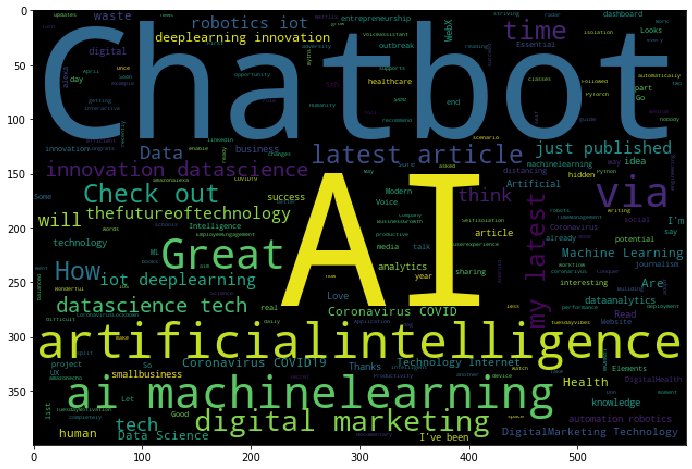

In [170]:
# Creating a word cloud
words = ' '.join([tweet for tweet in df['Tweet']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()

In [11]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [12]:
df.head()

,Tweet,Subjectivity,Polarity,Score
0,Some practical AI with Data Science and NLP. h...,0.000000,0.000000,Neutral
1,Currently reading. Halfway through the book. R...,0.500000,0.350000,Positive
2,A quick look at digital marketing and customer...,0.250000,0.166667,Positive
3,Check out my latest article: The real secret o...,0.633333,0.066667,Positive
4,Check out my latest article: What is hidden in...,0.616667,0.166667,Positive


In [176]:
# Calculate the percentage of positive tweets
positive = df[df['Score'] == 'Positive']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")

62.0 % of positive tweets


<BarContainer object of 3 artists>

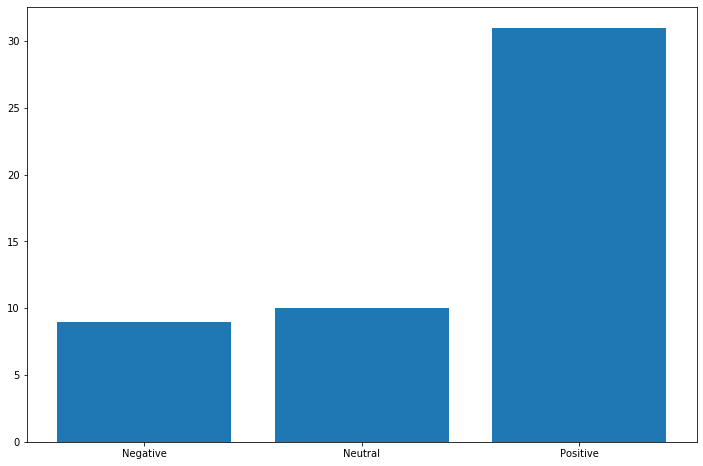

In [173]:
# Visualise positive, negative, neutral tweets
# plt.bar()
labels = df.groupby('Score').count().index.values
labels

values = df.groupby('Score').size().values
values

plt.bar(labels, values)

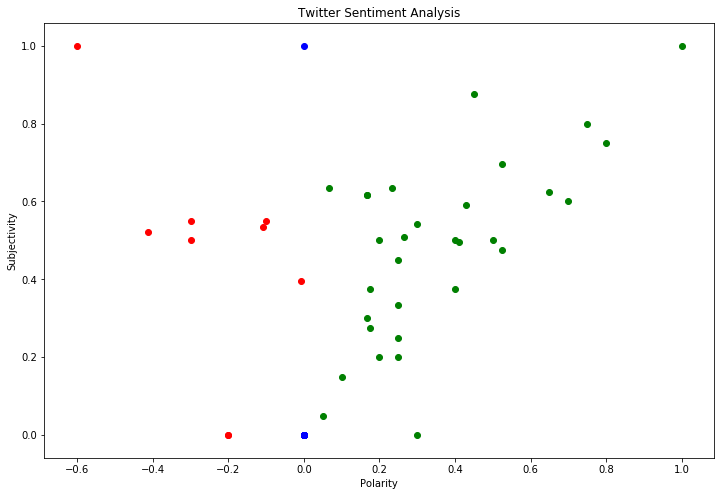

In [174]:
# Plotting sentiment

for index, row in df.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
# add legend
plt.show()

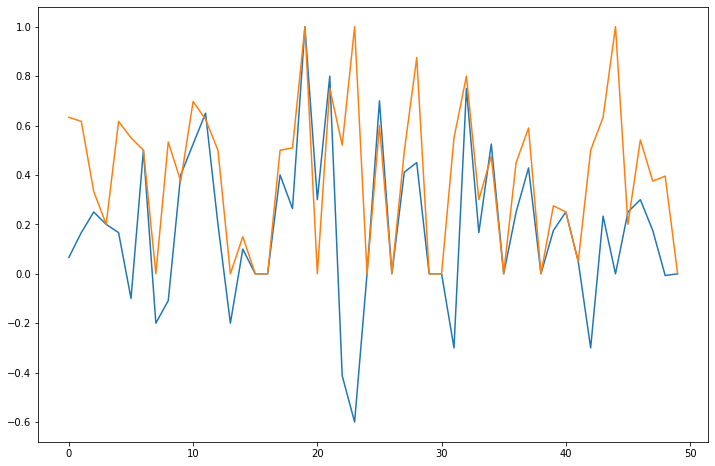

In [175]:
# Polarity over time

plt.plot(df['Polarity'])
plt.plot(df['Subjectivity'])
plt.show()

In [181]:
df.groupby('Score').count()

,Tweet,Subjectivity,Polarity
Score,,,
Negative,9,9,9
Neutral,10,10,10
Positive,31,31,31
